In [231]:
import os
from dotenv import load_dotenv
from statsbombpy import sb
import pandas as pd
# Load environment variables from .env file (if it exists)
load_dotenv()

# Set credentials if available
username = os.getenv('SB_USERNAME')
password = os.getenv('SB_PASSWORD')

if username and password:
    print("Credentials loaded successfully")
else:
    print("No credentials found - using open data access only")

Credentials loaded successfully


In [232]:
# Define all available seasons
seasons = [
    (108, "2021/2022"),
    (235, "2022/2023"), 
    (281, "2023/2024"),
    (317, "2024/2025")
]

# Fetch data from all seasons
all_season_stats = []

for season_id, season_name in seasons:
    print(f"Fetching data for season {season_name} (ID: {season_id})...")
    season_stats = sb.player_season_stats(competition_id=73, season_id=season_id)
    
    # Add season information to distinguish same players across seasons
    season_stats['season_id'] = season_id
    season_stats['season_name'] = season_name
    
    # Create unique player identifier combining player_id and season_id
    # This ensures same player in different seasons is treated as distinct
    season_stats['player_season_id'] = season_stats['player_id'].astype(str) + '_' + season_stats['season_id'].astype(str)
    
    all_season_stats.append(season_stats)
    print(f"  - Found {len(season_stats)} player records")

# Combine all seasons
combined_season_stats = pd.concat(all_season_stats, ignore_index=True)
print(f"\nTotal combined records: {len(combined_season_stats)}")

# Show column info
print(f"\nColumns: {len(combined_season_stats.columns)}")
print("Sample columns:", combined_season_stats.columns.tolist()[:10])


Fetching data for season 2021/2022 (ID: 108)...


  - Found 603 player records
Fetching data for season 2022/2023 (ID: 235)...
  - Found 591 player records
Fetching data for season 2023/2024 (ID: 281)...
  - Found 623 player records
Fetching data for season 2024/2025 (ID: 317)...
  - Found 636 player records

Total combined records: 2453

Columns: 225
Sample columns: ['account_id', 'player_id', 'player_name', 'team_id', 'team_name', 'competition_id', 'competition_name', 'season_id', 'season_name', 'country_id']


In [233]:
striker_filter = (
    (combined_season_stats['primary_position'] == 'Centre Forward') | 
    (combined_season_stats['secondary_position'] == 'Centre Forward') |
    (combined_season_stats['primary_position'] == 'Left Centre Forward') | 
    (combined_season_stats['secondary_position'] == 'Left Centre Forward') |
    (combined_season_stats['primary_position'] == 'Right Centre Forward') | 
    (combined_season_stats['secondary_position'] == 'Right Centre Forward')
)

striker_stats = combined_season_stats[striker_filter].copy()

# 1️⃣  Filter by minutes
striker_stats_filtered = striker_stats[striker_stats["player_season_minutes"] >= 500].copy()

print(f"Total strikers found: {len(striker_stats)}")
print(f"Strikers with 500+ minutes: {len(striker_stats_filtered)}")

# Show position distribution
print(f"\nPosition distribution (primary positions):")
primary_positions = striker_stats_filtered['primary_position'].value_counts()
print(primary_positions)

print(f"\nPosition distribution (secondary positions):")
secondary_positions = striker_stats_filtered['secondary_position'].value_counts()
print(secondary_positions)

print(f"\nStrikers per season:")
print(striker_stats_filtered['season_name'].value_counts().sort_index())

striker_stats_filtered


Total strikers found: 419
Strikers with 500+ minutes: 279

Position distribution (primary positions):
primary_position
Centre Forward                 150
Right Centre Forward            45
Left Centre Forward             30
Centre Attacking Midfielder     24
Left Wing                       13
Left Midfielder                  6
Right Wing                       6
Right Centre Midfielder          1
Left Back                        1
Right Centre Back                1
Left Centre Midfielder           1
Right Wing Back                  1
Name: count, dtype: int64

Position distribution (secondary positions):
secondary_position
Left Centre Forward            125
Right Centre Forward            82
Centre Forward                  42
Centre Attacking Midfielder     13
Left Wing                        6
Right Wing                       4
Right Midfielder                 3
Left Midfielder                  2
Right Defensive Midfielder       1
Left Attacking Midfielder        1
Name: count, dtype: 

,account_id,player_id,player_name,team_id,team_name,competition_id,competition_name,season_id,season_name,country_id,...,player_season_f3_lbp_to_space_10_90,player_season_lbp_to_space_2_90,player_season_fhalf_lbp_to_space_2_90,player_season_f3_lbp_to_space_2_90,player_season_lbp_to_space_5_90,player_season_fhalf_lbp_to_space_5_90,player_season_f3_lbp_to_space_5_90,player_season_360_minutes,player_season_defensive_actions_90,player_season_id
12,41100,27796,Fernando Luis Aristeguieta de Luca,1226,Puebla,73,Liga MX,108,2021/2022,246,...,0.0,0.526624,0.526624,0.239374,0.095750,0.095750,0.047875,1879.9000,12.112347,27796_108
24,41100,44746,José Enrique Angulo Caicedo,1228,Querétaro,73,Liga MX,108,2021/2022,65,...,0.0,0.526350,0.438625,0.087725,0.263175,0.175450,0.000000,1025.9333,15.000974,44746_108
32,41100,34396,Michael Steveen Estrada Martínez,1227,Toluca,73,Liga MX,108,2021/2022,65,...,0.0,0.399664,0.399664,0.266443,0.133221,0.133221,0.133221,675.5667,12.256377,34396_108
35,41100,31052,Bryan Dennys Angulo Tenorio,1224,Cruz Azul,73,Liga MX,108,2021/2022,65,...,0.0,0.682719,0.434458,0.186196,0.434458,0.248262,0.062065,1450.0835,15.826674,31052_108
39,41100,3264,Vincent Janssen,1222,Monterrey,73,Liga MX,108,2021/2022,160,...,0.0,0.644783,0.537319,0.214928,0.376123,0.268659,0.107464,1674.9833,13.164310,3264_108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,41100,123690,Vitor Samuel Ferreira Arantes,1287,Atlético San Luis,73,Liga MX,317,2024/2025,31,...,0.0,0.953309,0.663172,0.414482,0.373034,0.248689,0.082896,2171.3833,17.781292,123690_317
2399,41100,78288,John Kennedy Batista de Souza,1298,Pachuca,73,Liga MX,317,2024/2025,31,...,0.0,1.030298,0.892925,0.412119,0.412119,0.274746,0.000000,1310.3000,22.872623,78288_317
2409,41100,27964,Nicolás Alejandro Ibáñez,1300,Tigres UANL,73,Liga MX,317,2024/2025,11,...,0.0,0.236014,0.202298,0.101149,0.101149,0.101149,0.033716,2669.3330,24.005997,27964_317
2413,41100,11500,Ignacio Pussetto,1301,Pumas UNAM,73,Liga MX,317,2024/2025,11,...,0.0,1.325411,0.822669,0.594150,0.457038,0.182815,0.091408,1969.2001,20.658134,11500_317


In [234]:
from sklearn.preprocessing import StandardScaler


# 2️⃣  Select the relevant features
features = [
    # --- Finishing ---
    "player_season_np_xg_90", "player_season_np_shots_90", "player_season_np_xg_per_shot",
    "player_season_npg_90", "player_season_conversion_ratio", "player_season_shot_on_target_ratio",
    "player_season_shot_touch_ratio", "player_season_over_under_performance_90",
    # --- Chance creation & link play ---
    "player_season_xa_90", "player_season_op_xa_90", "player_season_sp_xa_90",
    "player_season_assists_90", "player_season_op_assists_90", "player_season_key_passes_90",
    "player_season_op_key_passes_90", "player_season_through_balls_90",
    "player_season_passes_into_box_90", "player_season_op_passes_into_box_90",
    "player_season_sp_passes_into_box_90", "player_season_passing_ratio",
    "player_season_pass_into_danger_ratio", "player_season_pass_length",
    # --- Carrying & dribbling ---
    "player_season_dribbles_90", "player_season_failed_dribbles_90", "player_season_carries_90",
    "player_season_carry_ratio", "player_season_carry_length", "player_season_dispossessions_90",
    "player_season_turnovers_90", "player_season_touches_inside_box_90",
    # --- OBV ---
    "player_season_obv_90", "player_season_obv_pass_90", "player_season_obv_shot_90",
    "player_season_obv_dribble_carry_90",
    # --- Space & movement (360°) ---
    "player_season_average_space_received_in", "player_season_average_f3_space_received_in",
    "player_season_f3_ball_receipts_in_space_2_ratio", "player_season_f3_ball_receipts_in_space_5_ratio",
    "player_season_lbp_90", "player_season_lbp_completed_90", "player_season_lbp_ratio",
    "player_season_f3_lbp_90", "player_season_f3_lbp_completed_90", "player_season_f3_lbp_ratio",
    "player_season_lbp_received_90", "player_season_f3_lbp_received_90",
    # --- Pressing intensity ---
    "player_season_pressures_90", "player_season_fhalf_pressures_90", "player_season_fhalf_pressures_ratio",
    "player_season_pressure_regains_90", "player_season_counterpressures_90",
    "player_season_counterpressure_regains_90", "player_season_aggressive_actions_90"
]

# Check which features are available in the combined dataset
available_features = [f for f in features if f in striker_stats_filtered.columns]
missing_features = [f for f in features if f not in striker_stats_filtered.columns]

print(f"Available features: {len(available_features)}")
print(f"Missing features: {len(missing_features)}")
if missing_features:
    print("Missing features:", missing_features[:10])  # Show first 10 missing

striker_features = striker_stats_filtered[available_features].copy()

# 3️⃣  Drop high-NaN columns
nan_threshold = 0.4
valid_cols = striker_features.columns[striker_features.isna().mean() <= nan_threshold]
striker_features = striker_features[valid_cols]

print(f"Features after NaN filtering: {len(valid_cols)}")

# 4️⃣  Impute remaining NaN with median
striker_features = striker_features.apply(lambda s: s.fillna(s.median()), axis=0)

# 5️⃣  Drop zero-variance columns
zero_var = striker_features.std() == 0
striker_features = striker_features.loc[:, ~zero_var]

print(f"Features after zero-variance filtering: {striker_features.shape[1]}")

# 6️⃣  Standardize
scaler = StandardScaler()
striker_features_scaled = scaler.fit_transform(striker_features)

# 7️⃣  Convert back to DataFrame for clarity
# Use player_season_id as index to ensure unique identification
striker_features_scaled_df = pd.DataFrame(
    striker_features_scaled, 
    columns=striker_features.columns, 
    index=striker_stats_filtered['player_season_id']
)

print(f"✅ Ready for PCA with {striker_features_scaled_df.shape[1]} features and {striker_features_scaled_df.shape[0]} strikers.")
print(f"Dataset spans {striker_stats_filtered['season_name'].nunique()} seasons: {sorted(striker_stats_filtered['season_name'].unique())}")



Available features: 53
Missing features: 0
Features after NaN filtering: 53
Features after zero-variance filtering: 53
✅ Ready for PCA with 53 features and 279 strikers.
Dataset spans 4 seasons: ['2021/2022', '2022/2023', '2023/2024', '2024/2025']


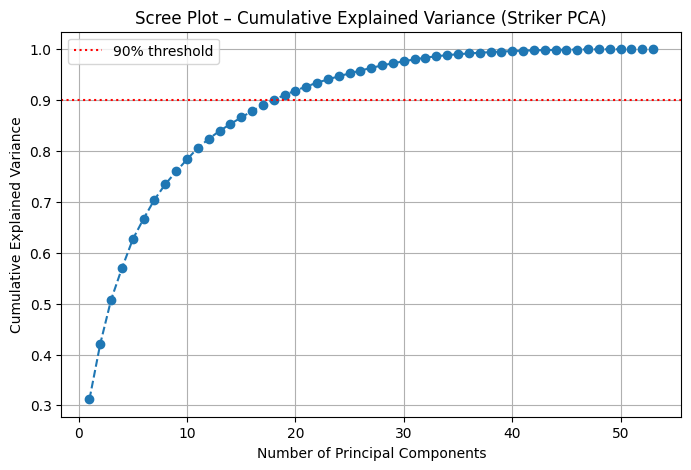

PC1: 0.312
PC2: 0.421
PC3: 0.508
PC4: 0.570
PC5: 0.627
PC6: 0.667
PC7: 0.704
PC8: 0.735
PC9: 0.760
PC10: 0.783
PC11: 0.806
PC12: 0.824
PC13: 0.839
PC14: 0.853
PC15: 0.866


In [235]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on the standardized striker features
pca = PCA()
X_pca = pca.fit_transform(striker_features_scaled_df)

# Explained variance per component
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# === Scree plot ===
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), cum_var, marker='o', linestyle='--', color='tab:blue')
plt.title("Scree Plot – Cumulative Explained Variance (Striker PCA)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(0.90, color='red', linestyle=':', label='90% threshold')
plt.grid(True)
plt.legend()
plt.show()

# Print the first 15 components' cumulative variance
for i, var in enumerate(cum_var[:15], 1):
    print(f"PC{i}: {var:.3f}")


In [236]:
from sklearn.preprocessing import normalize
import pandas as pd

# keep first 8 components
n_pcs = 6
X_pca_reduced = X_pca[:, :n_pcs]

# L2-normalize for cosine clustering
X_pca_normalized = normalize(X_pca_reduced, norm='l2')

striker_pca_df = pd.DataFrame(
    X_pca_normalized,
    columns=[f"PC{i+1}" for i in range(n_pcs)],
    index=striker_features_scaled_df.index  # Use the player_season_id index
)

print(f"PCA DataFrame shape: {striker_pca_df.shape}")
print(striker_pca_df.head())


PCA DataFrame shape: (279, 6)
                       PC1       PC2       PC3       PC4       PC5       PC6
player_season_id                                                            
27796_108        -0.512738  0.154593 -0.669411 -0.402837  0.316235  0.052978
44746_108        -0.809431 -0.060590 -0.339761 -0.087451  0.400919 -0.239436
34396_108        -0.337453 -0.065629 -0.212979 -0.735590  0.523636 -0.145499
31052_108        -0.603323 -0.034717 -0.420747  0.432149 -0.517773  0.054093
3264_108         -0.234220  0.406893 -0.082683 -0.821946 -0.017063  0.311217


In [237]:
# Loadings matrix: features x components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=striker_features_scaled_df.columns
)

# View top contributing features for each of the first few PCs
for i in range(6):
    print(f"\nTop 5 features for PC{i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(5))



Top 5 features for PC1:
player_season_passes_into_box_90     0.221790
player_season_carries_90             0.219544
player_season_lbp_completed_90       0.218286
player_season_f3_lbp_completed_90    0.212214
player_season_lbp_90                 0.209609
Name: PC1, dtype: float64

Top 5 features for PC2:
player_season_npg_90                   0.296532
player_season_np_xg_90                 0.250560
player_season_touches_inside_box_90    0.243859
player_season_f3_lbp_received_90       0.234372
player_season_conversion_ratio         0.231252
Name: PC2, dtype: float64

Top 5 features for PC3:
player_season_pressures_90             0.392048
player_season_counterpressures_90      0.369410
player_season_fhalf_pressures_90       0.367958
player_season_aggressive_actions_90    0.362468
player_season_pressure_regains_90      0.341665
Name: PC3, dtype: float64

Top 5 features for PC4:
player_season_conversion_ratio             0.371119
player_season_obv_shot_90                  0.365518
player_s

In [238]:
# === Extract Striker Ability Scores from PCA ===
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- 1️⃣ Choose how many PCA components (abilities) to keep ---
n_abilities = 6

# --- 2️⃣ Transform your standardized feature matrix using fitted PCA ---
# (Assumes `pca` already fitted on `striker_features_scaled_df`)
ability_scores = pca.transform(striker_features_scaled_df)[:, :n_abilities]

# --- 3️⃣ Create a DataFrame for the ability scores ---
ability_labels = [
    "Progressive_Play",
    "Finishing_BoxPresence",
    "Pressing_WorkRate",
    "Finishing_Efficiency",
    "Dribbling_RiskTaking",
    "DecisionMaking_Balance"
]

ability_df = pd.DataFrame(
    ability_scores,
    columns=ability_labels,
    index=striker_features_scaled_df.index
)

# --- 4️⃣ Optional: normalize ability scores for better interpretability ---
scaler = MinMaxScaler()
ability_df_norm = pd.DataFrame(
    scaler.fit_transform(ability_df),
    columns=ability_labels,
    index=striker_features_scaled_df.index
)

# --- 5️⃣ Attach ability scores back to your main striker features DataFrame ---
striker_features = pd.concat([striker_features_scaled_df, ability_df_norm], axis=1)

print("✅ Added normalized striker ability scores:")
display(striker_features[ability_labels].head())


✅ Added normalized striker ability scores:


,Progressive_Play,Finishing_BoxPresence,Pressing_WorkRate,Finishing_Efficiency,Dribbling_RiskTaking,DecisionMaking_Balance
player_season_id,,,,,,
27796_108,0.171582,0.556537,0.353347,0.280748,0.573199,0.549755
44746_108,0.084478,0.499710,0.417217,0.366977,0.644470,0.397116
34396_108,0.169867,0.493010,0.439692,0.065906,0.772089,0.427608
31052_108,0.169214,0.510694,0.430258,0.508421,0.264279,0.547196
3264_108,0.193940,0.685660,0.488581,0.000000,0.434525,0.753295


In [239]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

scores = []

# test cluster counts 2–10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pca_normalized)
    
    sil = silhouette_score(X_pca_normalized, labels, metric='cosine')
    db = davies_bouldin_score(X_pca_normalized, labels)
    scores.append((k, sil, db))

# print results
print("k | silhouette | davies-bouldin")
for k, sil, db in scores:
    print(f"{k:2d} | {sil:10.3f} | {db:10.3f}")


k | silhouette | davies-bouldin
 2 |      0.424 |      1.520
 3 |      0.344 |      1.715
 4 |      0.337 |      1.645
 5 |      0.323 |      1.622
 6 |      0.330 |      1.521
 7 |      0.303 |      1.595
 8 |      0.295 |      1.522
 9 |      0.299 |      1.497
10 |      0.296 |      1.533


In [240]:
from sklearn.mixture import GaussianMixture
import pandas as pd

n_clusters = 3  # keep same interpretability
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(X_pca_normalized)

# hard cluster assignment
cluster_labels = gmm.predict(X_pca_normalized)

# soft probabilities
cluster_probs = gmm.predict_proba(X_pca_normalized)

# Create cluster assignment DataFrame with proper index
cluster_df = pd.DataFrame(
    {
        'cluster': cluster_labels,
        **{f"cluster_{i}_prob": cluster_probs[:, i] for i in range(n_clusters)}
    },
    index=striker_pca_df.index  # Use player_season_id as index
)

# Merge cluster assignments back to the original striker data
# First, set player_season_id as index for striker_stats_filtered if not already
if 'player_season_id' not in striker_stats_filtered.index.names:
    striker_stats_filtered = striker_stats_filtered.set_index('player_season_id')

# Merge cluster data
striker_stats_with_clusters = striker_stats_filtered.join(cluster_df, how='left')

print(f"Clustering completed for {len(striker_stats_with_clusters)} striker-season combinations")
print(f"Cluster distribution:")
print(striker_stats_with_clusters['cluster'].value_counts().sort_index())

striker_stats_with_clusters.head()


Clustering completed for 311 striker-season combinations
Cluster distribution:
cluster
0     82
1    109
2    120
Name: count, dtype: int64


,account_id,player_id,player_name,team_id,team_name,competition_id,competition_name,season_id,season_name,country_id,...,player_season_f3_lbp_to_space_2_90,player_season_lbp_to_space_5_90,player_season_fhalf_lbp_to_space_5_90,player_season_f3_lbp_to_space_5_90,player_season_360_minutes,player_season_defensive_actions_90,cluster,cluster_0_prob,cluster_1_prob,cluster_2_prob
player_season_id,,,,,,,,,,,,,,,,,,,,,
27796_108,41100,27796,Fernando Luis Aristeguieta de Luca,1226,Puebla,73,Liga MX,108,2021/2022,246,...,0.239374,0.095750,0.095750,0.047875,1879.9000,12.112347,2,4.450215e-14,0.004688,0.995312
44746_108,41100,44746,José Enrique Angulo Caicedo,1228,Querétaro,73,Liga MX,108,2021/2022,65,...,0.087725,0.263175,0.175450,0.000000,1025.9333,15.000974,1,3.325997e-18,0.886619,0.113381
34396_108,41100,34396,Michael Steveen Estrada Martínez,1227,Toluca,73,Liga MX,108,2021/2022,65,...,0.266443,0.133221,0.133221,0.133221,675.5667,12.256377,1,1.630035e-12,0.891475,0.108525
31052_108,41100,31052,Bryan Dennys Angulo Tenorio,1224,Cruz Azul,73,Liga MX,108,2021/2022,65,...,0.186196,0.434458,0.248262,0.062065,1450.0835,15.826674,2,1.499694e-14,0.000084,0.999916
3264_108,41100,3264,Vincent Janssen,1222,Monterrey,73,Liga MX,108,2021/2022,160,...,0.214928,0.376123,0.268659,0.107464,1674.9833,13.164310,2,6.308127e-15,0.000739,0.999261


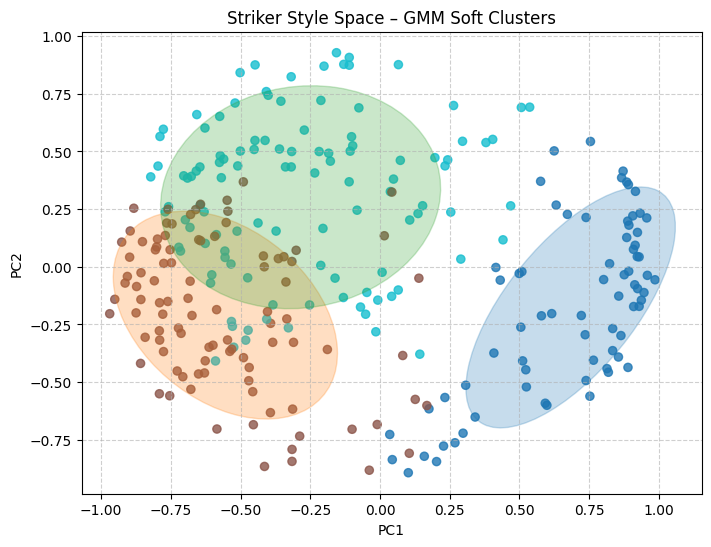

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

def plot_gmm_clusters(X, gmm, labels, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))

    # scatter: color by dominant cluster
    ax.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=35, alpha=0.8)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Striker Style Space – GMM Soft Clusters")

    # draw Gaussian ellipses for cluster covariances
    for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
        # project covariance to first two PCs
        sub_cov = cov[:2, :2]
        v, w = np.linalg.eigh(sub_cov)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.degrees(np.arctan2(u[1], u[0]))

        # ✅ updated syntax: specify xy=
        ell = Ellipse(
            xy=mean[:2],
            width=v[0],
            height=v[1],
            angle=180+angle,
            color=f"C{i}",
            alpha=0.25
        )
        ax.add_patch(ell)

    plt.grid(True, linestyle="--", alpha=0.6)
    return ax

plot_gmm_clusters(X_pca_normalized, gmm, cluster_labels)
plt.show()


In [242]:
print(gmm.means_.shape, gmm.covariances_.shape)


(3, 6) (3, 6, 6)


In [243]:
import pandas as pd

# number of players per cluster
cluster_counts = striker_stats_with_clusters["cluster"].value_counts().sort_index()
display(cluster_counts)

# average soft membership (confidence per cluster)
proba_cols = [c for c in striker_stats_with_clusters.columns if c.startswith("cluster_")]
avg_confidence = striker_stats_with_clusters[proba_cols].max(axis=1).mean().round(3)
print(f"Average cluster confidence: {avg_confidence}")

# Show cluster distribution by season
print(f"\nCluster distribution by season:")
cluster_by_season = striker_stats_with_clusters.groupby(['season_name', 'cluster']).size().unstack(fill_value=0)
display(cluster_by_season)


cluster
0     82
1    109
2    120
Name: count, dtype: int64

Average cluster confidence: 0.963

Cluster distribution by season:


cluster,0,1,2
season_name,,,
2021/2022,27,20,32
2022/2023,19,25,37
2023/2024,22,33,32
2024/2025,14,31,19


In [244]:
import numpy as np
np.round(gmm.weights_, 3)

array([0.253, 0.336, 0.411])

In [245]:
# check cluster probabilities (average across all players)
proba_cols = [c for c in striker_stats_with_clusters.columns if c.startswith("cluster_")]
print("Mean membership per cluster:")
print(striker_stats_with_clusters[proba_cols].mean().round(3))


Mean membership per cluster:
cluster_0_prob    0.259
cluster_1_prob    0.339
cluster_2_prob    0.402
dtype: float64


In [246]:
# Show ability scores by cluster
ability_labels = [
    "Progressive_Play",
    "Finishing_BoxPresence", 
    "Pressing_WorkRate",
    "Finishing_Efficiency",
    "Dribbling_RiskTaking",
    "DecisionMaking_Balance"
]

# Merge striker_features with cluster data using player_season_id
striker_features_reset = striker_features.reset_index()
striker_clusters_reset = striker_stats_with_clusters[['cluster']].reset_index()

# Merge on player_season_id
merged_data = striker_features_reset.merge(striker_clusters_reset, on='player_season_id', how='left')

# Calculate mean ability scores by cluster
cluster_ability_profiles = merged_data.groupby('cluster')[ability_labels].mean()

print("Ability Scores by Cluster:")
print(cluster_ability_profiles.round(3))


Ability Scores by Cluster:
         Progressive_Play  Finishing_BoxPresence  Pressing_WorkRate  \
cluster                                                               
0                   0.522                  0.463              0.531   
1                   0.134                  0.475              0.605   
2                   0.198                  0.601              0.461   

         Finishing_Efficiency  Dribbling_RiskTaking  DecisionMaking_Balance  
cluster                                                                      
0                       0.423                 0.457                   0.550  
1                       0.389                 0.467                   0.526  
2                       0.418                 0.397                   0.514  


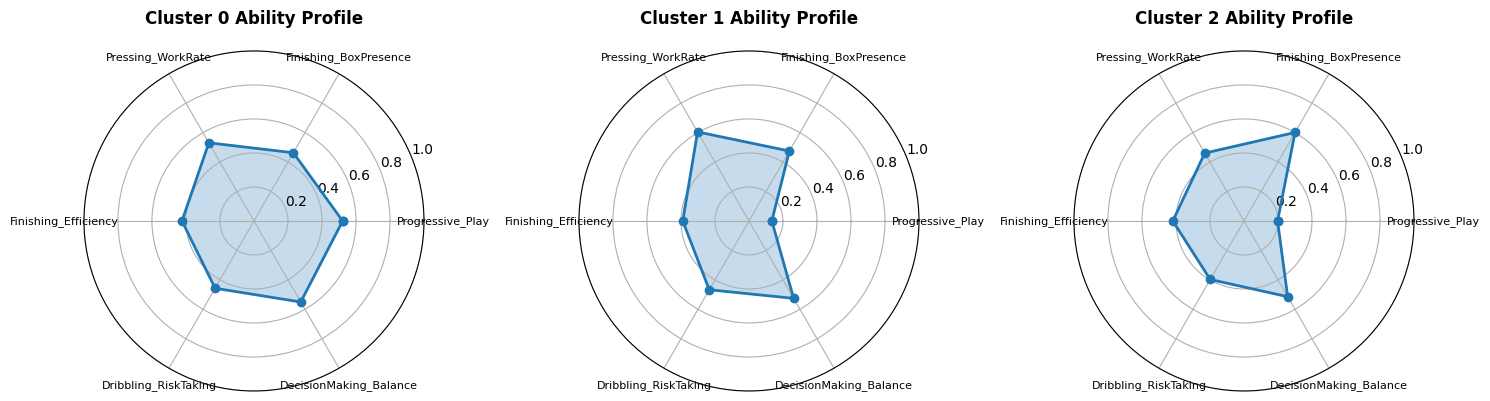

In [247]:
# Create radar charts for each cluster
import matplotlib.pyplot as plt
import numpy as np

# Set up the radar chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(projection='polar'))

# Define angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(ability_labels), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Create radar chart for each cluster
for cluster_id in sorted(cluster_ability_profiles.index):
    ax = axes[cluster_id]
    
    # Get cluster ability scores
    cluster_scores = cluster_ability_profiles.loc[cluster_id, ability_labels].values.tolist()
    cluster_scores += cluster_scores[:1]  # Complete the circle
    
    # Plot the radar chart
    ax.plot(angles, cluster_scores, 'o-', linewidth=2, label=f'Cluster {cluster_id}')
    ax.fill(angles, cluster_scores, alpha=0.25)
    
    # Set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(ability_labels, fontsize=8)
    ax.set_ylim(0, 1)  # Since ability scores are normalized 0-1
    ax.set_title(f'Cluster {cluster_id} Ability Profile', size=12, fontweight='bold', pad=20)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [248]:
# Add this code to the end of your striker PCA clustering notebook
# to generate real artifacts:

import os
import json
import pandas as pd
import numpy as np

def generate_tactical_profile_artifacts():
    """Generate artifacts from the completed PCA analysis."""
    
    # Create artifacts directory
    artifacts_dir = "data/processed/striker_artifacts"
    os.makedirs(artifacts_dir, exist_ok=True)
    
    print("Generating tactical profile artifacts from PCA analysis...")
    
    # 1. Generate ability axes
    axes = [
        {"key": "Progressive_Play", "label": "Progressive Play", "description": "Ball progression & link play"},
        {"key": "Finishing_BoxPresence", "label": "Finishing & Box Presence", "description": "Goal scoring and box positioning"},
        {"key": "Pressing_WorkRate", "label": "Pressing Work Rate", "description": "Defensive pressure and work rate"},
        {"key": "Finishing_Efficiency", "label": "Finishing Efficiency", "description": "Shot conversion and efficiency"},
        {"key": "Dribbling_RiskTaking", "label": "Dribbling & Risk-Taking", "description": "Ball carrying and risk taking"},
        {"key": "DecisionMaking_Balance", "label": "Decision Making & Balance", "description": "Decision making and balance"}
    ]
    
    with open(os.path.join(artifacts_dir, "ability_axes.json"), 'w') as f:
        json.dump(axes, f, indent=2)
    
    # 2. Save ability scores (normalized)
    ability_scores_df = ability_df_norm.copy()
    ability_scores_df.to_parquet(os.path.join(artifacts_dir, "ability_scores.parquet"))
    
    # 3. Calculate percentiles
    percentiles_data = {}
    for col in ability_df_norm.columns:
        percentiles_data[col] = ability_df_norm[col].rank(pct=True) * 100
    
    percentiles_df = pd.DataFrame(percentiles_data, index=ability_df_norm.index)
    percentiles_df.to_parquet(os.path.join(artifacts_dir, "ability_percentiles.parquet"))
    
    # 4. Generate league reference (median values)
    league_ref = percentiles_df.median().to_dict()
    with open(os.path.join(artifacts_dir, "league_reference.json"), 'w') as f:
        json.dump(league_ref, f, indent=2)
    
    # 5. Generate axis ranges
    axis_ranges = {}
    for col in ability_df_norm.columns:
        axis_ranges[col] = {
            "min": float(ability_df_norm[col].min()),
            "max": float(ability_df_norm[col].max())
        }
    
    with open(os.path.join(artifacts_dir, "axis_ranges.json"), 'w') as f:
        json.dump(axis_ranges, f, indent=2)
    
    print(f"Generated artifacts for {len(ability_df_norm)} strikers")
    print("Artifacts saved to:", artifacts_dir)

# Run the function
generate_tactical_profile_artifacts()


Generating tactical profile artifacts from PCA analysis...
Generated artifacts for 279 strikers
Artifacts saved to: data/processed/striker_artifacts
